In [1]:
import time
import matplotlib.pyplot as plt
import tracemalloc
import copy
import random

In [2]:
def is_valid(board, row, col, num):
    if num in board[row]:
        return False

    for r in range(9):
        if board[r][col] == num:
            return False

    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for r in range(start_row, start_row + 3):
        for c in range(start_col, start_col + 3):
            if board[r][c] == num:
                return False

    return True

In [3]:
def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:  # Empty cell
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True

In [4]:
example_board = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Original Sudoku Puzzle:")
for row in example_board:
    print(row)

Original Sudoku Puzzle:
[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]


In [5]:
board_copy = copy.deepcopy(example_board)
start = time.time()
solve_sudoku(board_copy)
end = time.time()

print("\nSolved Sudoku Puzzle:")
for row in board_copy:
    print(row)

print("\nExecution Time:", end - start, "seconds")


Solved Sudoku Puzzle:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

Execution Time: 0.04893207550048828 seconds


In [6]:
def generate_board(blank_cells=40):
    """Generate a simple puzzle by blanking out cells from a solved board."""
    solved = [
        [5,3,4,6,7,8,9,1,2],
        [6,7,2,1,9,5,3,4,8],
        [1,9,8,3,4,2,5,6,7],
        [8,5,9,7,6,1,4,2,3],
        [4,2,6,8,5,3,7,9,1],
        [7,1,3,9,2,4,8,5,6],
        [9,6,1,5,3,7,2,8,4],
        [2,8,7,4,1,9,6,3,5],
        [3,4,5,2,8,6,1,7,9]
    ]
    puzzle = copy.deepcopy(solved)
    blanks = set()
    while len(blanks) < blank_cells:
        r, c = random.randint(0,8), random.randint(0,8)
        puzzle[r][c] = 0
        blanks.add((r,c))
    return puzzle

In [7]:
sizes = [20, 30, 40, 50, 55]  # number of blank cells
times = []
spaces = []

In [8]:
for blanks in sizes:
    puzzle = generate_board(blank_cells=blanks)

    tracemalloc.start()
    start = time.time()
    solve_sudoku(puzzle)
    end = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    times.append(end - start)
    spaces.append(peak / 1024)

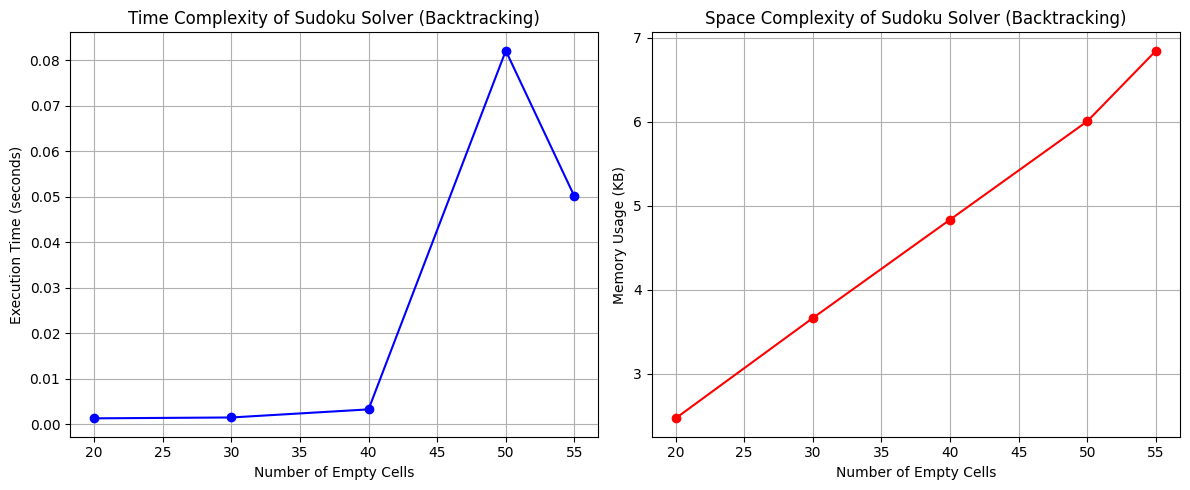

In [9]:
plt.figure(figsize=(12,5))

# Time Complexity Graph
plt.subplot(1,2,1)
plt.plot(sizes, times, marker='o', color='blue')
plt.title("Time Complexity of Sudoku Solver (Backtracking)")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)

# Space Complexity Graph
plt.subplot(1,2,2)
plt.plot(sizes, spaces, marker='o', color='red')
plt.title("Space Complexity of Sudoku Solver (Backtracking)")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Memory Usage (KB)")
plt.grid(True)

plt.tight_layout()
plt.show()